# Scientific Computing with Python

## Scientific Computing
Scientific computing refers to the use of computational tools to solve scientific problems. It is an umbrella term for multiple subfields of computer science and other scientific disciplines, e.g. machine learning, bioinformatics, simulation, etc.

## Python for Scientific Computing
For a long time, MATLAB was the *lingua franca* of scientific computing; however, recently things have changed dramatically. New languages for scientific computing have burst on to the scene (e.g. Julia) and older programming languages were supplemented with new libraries that gave them the capabilities to handle this programming paradigm. In the case of Python, the Scipy stack was critical in making Python a huge player in the scientific computing world.

The Scipy stack is a collection of open source libraries that enable easy scientific computing in Python. The most popular of these libraries are:

* **Numpy**: a fast matrix maths library for Python
* **Matplotlib**: a mature plotting library for Python (Note that this is the same as the library used in Julia)
* **Scipy**: a collection of utilities for scientific computing
* **pandas**: implements data structures for processing and manipulating data
* **Sympy**: a symbol maths library for Python
* **scikit-learn**: a machine learning library for Python

## Numpy and Matplotlib
In this tutorial, we are going to look into two of the above libraries, namely Numpy and Matplotlib. We will motivate this by a simple machine learning / data analysis example.

## Limitations of Python Lists
Python lists can act like vectors in a scientific implementation; however, operating on them is a big hassle. Firstly, in Python there is no such thing as a matrix. To implement a matrix, we need to create a list of lists.

In [1]:
list_of_lists = [list(range(5)) for i in range(5)] # 5x5 matrix
list_of_lists 

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]

In [2]:
['number ' +str(n) for n in range(5)]

['number 0', 'number 1', 'number 2', 'number 3', 'number 4']

In [ ]:
print(list_of_lists[0][3]) # Access element (0, 3) (or (1, 4) in mathematical indexing)

To do operations with such a data structure requires writing lots of computer code. For instance, if we are to add 3 to every element in this matrix we need to loop over all the elements and add 3 to each.

In [ ]:
for i in range(5):
    for j in range(5):
        list_of_lists[i][j] = list_of_lists[i][j] + 3

In [ ]:
list_of_lists

As you can imagine, the more complex the operation that we want to perform, the harder it gets to implement and the more code we need to write (which increases the probability of making mistakes). Hence, we need a tool to abstract these operations away: Enter Numpy! Note, we use `import` to call a library and `as` to give the library a _nickname_.

In [2]:
import numpy as np
numpy_matrix = np.array([range(5) for i in range(5)])
numpy_matrix

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [3]:
numpy_matrix[0, 3] # Note how the syntax differs between Numpy arrays and Python lists of lists

3

To add a scalar to every element in the matrix, simply do:

In [4]:
numpy_matrix = numpy_matrix + 3

In [5]:
numpy_matrix

array([[3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7]])

## Elementwise Operations
The above is an example of an elementwise operation (applying an operation to every element). Numpy is very efficient at those and has an intuitive syntax for them. Numpy uses vectorization (look that up!) to perform these operations efficiently. Here is an example of elementwise multiplication of two matrices.

In [6]:
# Example of array creation in Numpy
a = np.ones((5, 5))
a

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [7]:
# Multiplication by Scaler
a = a * 3
a

array([[ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.]])

In [8]:
b = np.array([range(5, 10) for j in range(5)])
b

array([[5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9],
       [5, 6, 7, 8, 9]])

In [ ]:
# Elementwise multiplication of two arrays
c = a * b
c

### Task 1
Look up and try some other elementwise operations in Numpy.

## Speed Up
Due to vectorization, Numpy provides a considerable amount of speed-up in elementwise operations compared to standard Python, even for one-dimensional arrays (lists). Here is an example of squaring each element in the array.

In [10]:
big_list = range(10000)
big_list

range(0, 10000)

In [11]:
big_array = np.arange(10000)
big_array

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [12]:
%%timeit
# Standard Python
[x**2 for x in big_list]

2.26 ms ± 60 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
# Numpy
big_array**2

7.46 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Notice the massive speed-up that Numpy offers in comparison to standard Python. Note that `%%timeit` is called a **magic command**, and this specific magic command is a shortcut for the timing function **timeit**. You can look into magic commands if you want.

## Multi-Dimensional Arrays
Numpy is not just restricted to vectors and matrices - it can handle arrays of arbitrary dimensions (as long as you have enough memory!).

In [2]:
lots_of_zeroes = np.zeros((10, 100, 11))
lots_of_zeroes

NameError: name 'np' is not defined

In [3]:
lots_of_zeroes.shape

NameError: name 'lots_of_zeroes' is not defined

Numpy arrays can be easily manipulated. For instance, we can easily reshape an array.

In [16]:
different_zeroes = lots_of_zeroes.reshape(1000, 11)
different_zeroes.shape

(1000, 11)

We can also select subranges of the array.

In [17]:
# Select first row
lots_of_zeroes[0,:,:]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [1]:
lots_of_zeroes[0,:,:].shape

NameError: name 'lots_of_zeroes' is not defined

In [ ]:
# Select first 100th column
lots_of_zeroes[:,99,:]

In [ ]:
lots_of_zeroes[:,99,:].shape

In [ ]:
# Select first 5 rows and first 50 columns
lots_of_zeroes[:5,:50,:]

In [ ]:
lots_of_zeroes[:5,:50,:].shape

We can also transpose the array.

In [ ]:
lots_of_zeroes.transpose()

In [ ]:
# All axes
lots_of_zeroes.transpose().shape

In [ ]:
# Last two axes
lots_of_zeroes.transpose([0,2,1]).shape

### Task 2
Look up **broadcasting** in Numpy.

## Example: Linear Regression

The following is a simple example for a linear regression in Numpy. We have the following model:
$$
y = 3x + 5 + \epsilon \\
\epsilon \sim N(0, 0.04)
$$

In [12]:
import numpy as np
X = np.random.uniform(size=(20, 1)) # Generate the Xs uniformly at random
Y = 3* X + 5. + np.random.normal(scale=0.2, size=(20, 1)) # Generate the Ys according to the equation above and add noise

In [10]:
# X= np.random.uniform(size=(20, 20))
# np.shape(X)
# seed 

(20, 20)

Now we plot the generated data. For this we use Matplotlib, a plotting library in the Scipy stack.

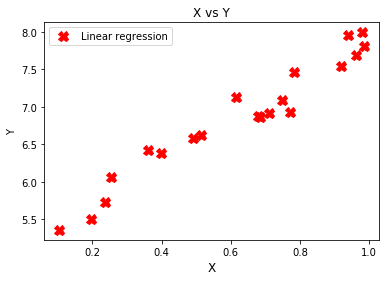

In [25]:
import matplotlib.pyplot as plt # Import the library
%matplotlib inline

# plt.scatter(X, Y) # Generate a scatter plot
plt.plot(X, Y, 'X', c = 'red', ms = 10, label = 'Linear regression')
plt.xlabel('X', fontsize = 12) # Label X axis
plt.ylabel('Y') # Label Y axis
plt.title('X vs Y')
plt.legend()

## Example function 
y = m x + c

In [26]:
def linear_regression(x, m = 1, c = 0):
    return m*x + c

In [29]:
linear_regression(x = 3, 
                 m = -5, 
                 c = 2)

-13

We define $\tilde{X}$ as the design matrix with the following form $[1, X]$, i.e. the first column is ones and the second are the $x$ locations. Hence, the solution to the regression is given by:
$$
\hat{W} = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^TY
$$

In [33]:
X_tilde = np.hstack([np.ones((20, 1)), X])
# X_tilde
# X_tilde*X_tilde

In [34]:
XT_X = np.dot(X_tilde.transpose(), X_tilde)
XT_X_inv = np.linalg.inv(XT_X)
XT_Y = np.dot(X_tilde.transpose(), Y)
W_hat = np.dot(XT_X_inv, XT_Y)

In [35]:
print(W_hat) # Pretty close to the generative model!

[[5.19797768]
 [2.68264831]]


Now we plot the results

Text(0.5, 1.0, 'X vs Y')

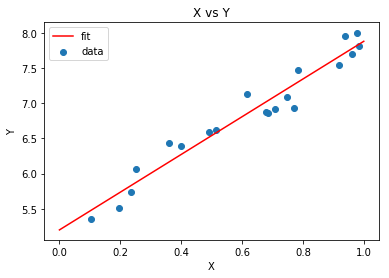

In [37]:
xx = np.linspace(0, 1, 100)
yy = W_hat[1]*xx + W_hat[0]
plt.scatter(X, Y, label ='data')
plt.plot(xx, yy, c='r', label ='fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')

## Capstone Project
Generate data and fit it to a linear model of the form:
$$
y = a + bx_1 + cx+2 + \epsilon \\
\epsilon \sim N(0, 0.04)
$$
You are free to pick what $a$, $b$ and $c$ are.

If this was too easy, fit the data to a ridge regression model:
$$
\hat{W} = (\tilde{X}^T\tilde{X} + \lambda I)^{-1}\tilde{X}^TY
$$
You are free to choose what $\lambda$ is.

Hint: to plot you might want to use a 3D scatter plot

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Text(0.5, 0, 'Y')

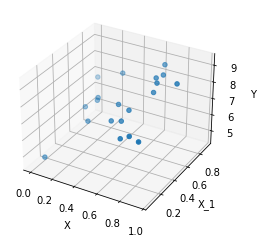

In [13]:
# Initialise coefficients
a = 2
b = 3
c = 4

# Fix seed for reproducibility
np.random.seed(10)

# Generate data
X = np.random.uniform(size=(20,1)) # Generate random X
X1 = np.random.uniform(size=(20,1)) # Generate random X1
Y = a + b*X1 + c*X + 2 + np.random.normal(scale=0.2, size=(20,1)) # Find Y and add noise

# Plot data
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X,X1,Y)

ax.set_xlabel('X')
ax.set_ylabel('X_1')
ax.set_zlabel('Y')


In [ ]:
# Attempt ridge regression model